# CNN

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #pip install sklearn
import os

In [2]:
(x_trainDep, y_train1), (x_testDep, y_test1) = tf.keras.datasets.mnist.load_data()
draw_classNumbers = [0,1,2,3,4,5,6,7,8,9]

In [3]:
def keepColor(img):
    # 0 = blanc et 1 = noir en binary
    data = np.array(img, dtype='uint8' )
    image = np.zeros((28,28))
    for i in range(0,27):
        for j in range(0,27):
            if (data[i][j] > 220):
                image[i][j] = 255
            else :
                image[i][j] = 0 
    #plt.imshow(image,cmap="binary")
    return image
# faire un keep color pour reduire info inutile (tracé trop epais)

In [5]:
k=0
x_train = np.zeros((len(x_trainDep),28,28))
x_test = np.zeros((len(x_testDep),28,28))
for img in x_trainDep:
    x_train[k]=keepColor(img)
    k+=1
k = 0
for img in x_testDep:
    x_test[k]=keepColor(img)
    k+=1

x_train = x_train.reshape((len(x_trainDep),28,28,1))
x_test = x_test.reshape((len(x_testDep),28,28,1))

In [15]:
dataset_dir = "../Reconnaissance d image/quick_draw_dataset" #Dossier
files = [name for name in os.listdir(dataset_dir) if ".npy" in name]
max_size_per_cl = 1500
draw_classDrawings = []

# Evalueate the size of the dataset
size = 0
for name in files:
    draws = np.load(os.path.join(dataset_dir, name))
    draws = draws[:max_size_per_cl] # Take only 10 000 draw
    size += draws.shape[0]

images = np.zeros((size, 28, 28, 1))
targets = np.zeros((size,))

it = 0
t = 0
for name in files:
    # Open each dataset and add the new class
    draw_classDrawings.append(name.replace("full_numpy_bitmap_", "").replace(".npy", ""))
    draws = np.load(os.path.join(dataset_dir, name))
    draws = draws[:max_size_per_cl] # Take only 10 000 draw
    # Add images to the buffer
    images[it:it+draws.shape[0]] = np.invert(draws.reshape(-1, 28, 28, 1))
    targets[it:it+draws.shape[0]] = t
    # Iter
    it += draws.shape[0]
    t += 1

images = images.astype(np.float32)
# Shuffle dataset
indexes = np.arange(size)
np.random.shuffle(indexes)
images = images[indexes]
targets = targets[indexes]

x_trainImgDep, x_testImgDep, y_train1Img, y_test1Img = train_test_split(images, targets, test_size=0.33)

In [16]:
def inverseColor(img):
    # 0 = blanc et 1 = noir en binary
    data = np.array(img, dtype='uint8' )
    image = np.zeros((28,28))
    for i in range(0,27):
        for j in range(0,27):
            if (data[i][j] > 120):
                image[i][j] = 0
            else :
                image[i][j] = 255 
    #plt.imshow(image,cmap="binary")
    return image

In [17]:
k=0
x_trainImg = np.zeros((len(x_trainImgDep),28,28))
x_testImg = np.zeros((len(x_testImgDep),28,28))
for img in x_trainImgDep:
    x_trainImg[k]=inverseColor(img)
    k+=1
k = 0
for img in x_testImgDep:
    x_testImg[k]=inverseColor(img)
    k+=1

x_trainImg = x_trainImg.reshape((len(x_trainImgDep),28,28,1))
x_testImg = x_testImg.reshape((len(x_testImgDep),28,28,1))

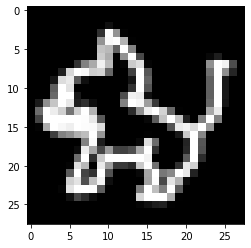

In [18]:
plt.imshow(x_trainImgDep[102].reshape(28,28),cmap="binary")

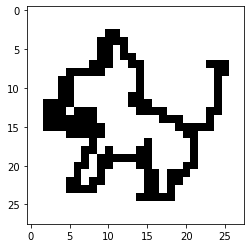

In [19]:
plt.imshow(x_trainImg[102].reshape(28,28),cmap="binary")

In [26]:
labels = draw_classNumbers + draw_classDrawings

In [27]:
#pour mettre a la suite des chiffres
for i in range(len(y_train1Img)):
    y_train1Img[i] = y_train1Img[i]+10
for i in range(len(y_test1Img)):
    y_test1Img[i] = y_test1Img[i]+10

In [28]:
print(labels[int(y_train1Img[102])])

dog


In [29]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#for /=255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_trainImg = x_trainImg.astype('float32')
x_testImg = x_testImg.astype('float32')

x_train/=255
x_test/=255
x_trainImg/=255
x_testImg/=255

In [31]:
nbTrain = len(x_train) + len(x_trainImg)
imagesTrain = np.zeros((nbTrain,28,28,1))
for i in range(len(x_train)):
    imagesTrain[i] = x_train[i]
k = 0
for i in range(len(x_train),nbTrain):
    imagesTrain[i] = x_trainImg[k]
    k += 1
    
nbTest = len(x_test) + len(x_testImg)
imagesTest = np.zeros((nbTest,28,28,1))
for i in range(len(x_test)):
    imagesTest[i] = x_test[i]
k = 0
for i in range(len(x_test),nbTest):
    imagesTest[i] = x_testImg[k]
    k += 1

In [32]:
targetsTrain1 = np.zeros((nbTrain,))
for i in range(len(y_train1)):
    targetsTrain1[i] = y_train1[i]
k = 0
for i in range(len(y_train1),nbTrain):
    targetsTrain1[i] = y_train1Img[k]
    k += 1
    
targetsTest1 = np.zeros((nbTest,))
for i in range(len(y_test1)):
    targetsTest1[i] = y_test1[i]
k = 0

for i in range(len(y_test1),nbTest):
    targetsTest1[i] = y_test1Img[k]
    k += 1

In [33]:
nb_class = 22

targetsTrain = tf.keras.utils.to_categorical(targetsTrain1, nb_class)
targetsTest = tf.keras.utils.to_categorical(targetsTest1, nb_class)

In [35]:
model = tf.keras.Sequential()

    
model.add(tf.keras.layers.Conv2D(64, 3, input_shape=(28,28,1), activation="relu"))
tf.keras.layers.BatchNormalization()
model.add(tf.keras.layers.Conv2D(64, 3, input_shape=(28,28,1), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
tf.keras.layers.BatchNormalization()

model.add(tf.keras.layers.Conv2D(128, 3, input_shape=(28,28,1), activation="relu"))
tf.keras.layers.BatchNormalization()
model.add(tf.keras.layers.Conv2D(128, 3, input_shape=(28,28,1), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
tf.keras.layers.BatchNormalization()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation="relu"))
tf.keras.layers.BatchNormalization()
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(nb_class, activation="softmax"))

In [36]:
model.compile( loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

In [37]:
generalize = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_generalize = tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = generalize.flow(imagesTrain, targetsTrain, batch_size=64)
test_generator = test_generalize.flow(imagesTest, targetsTest, batch_size=64)

In [38]:
nbTrain = imagesTrain.shape[0]
nbTest = imagesTest.shape[0]
# nb de batch => 60000//64 (64 img par batch) => 937
# une epoch => 937 * 1 batch (parcour toutes les images et apprends 64 par 64)
# fait 20 ces epochs, entre le model a appris et les erreurs se reduisent 

model.fit_generator(train_generator, steps_per_epoch=nbTrain//64, epochs=22, 
                    validation_data=test_generator, validation_steps=nbTest//64)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1125 steps, validate for 249 steps
Epoch 1/22
1125/1125 [==============================] - 604s 537ms/step - loss: 0.4135 - accuracy: 0.8764 - val_loss: 0.2714 - val_accuracy: 0.9166
Epoch 2/22
1125/1125 [==============================] - 646s 574ms/step - loss: 0.1905 - accuracy: 0.9426 - val_loss: 0.2125 - val_accuracy: 0.9389
Epoch 3/22
1125/1125 [==============================] - 630s 560ms/step - loss: 0.1483 - accuracy: 0.9551 - val_loss: 0.1805 - val_accuracy: 0.9492
Epoch 4/22
1125/1125 [==============================] - 651s 578ms/step - loss: 0.1281 - accuracy: 0.9614 - val_loss: 0.1745 - val_accuracy: 0.9529
Epoch 5/22
1125/1125 [==============================] - 651s 579ms/step - loss: 0.1159 - accuracy: 0.9646 - val_loss: 0.1619 - val_accuracy: 0.9561
Epoch 6/22
1125/1125 [==============================] - 590s 525ms/step - loss: 0.1034 - 

In [39]:
model.save("model")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for keyword: 1, expecting 2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for keyword: 1, expecting 2
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [100]:
model = tf.keras.models.load_model("model")

#### test

In [101]:
def openImageKeepColor(filename):
    img = Image.open( filename + '.jpg' )
    data = np.array(img, dtype='uint8' )
    image = np.zeros((28,28))
    for i in range(0,27):
        for j in range(0,27):
            image[i][j] = data[i][j][0]
    #plt.imshow(image,cmap="binary")
    return image

def openImageInverseColor(filename):
    # 0 = blanc et 1 = noir en binary
    img = Image.open(filename + '.jpg')
    data = np.array(img, dtype='uint8')
    image = np.zeros((28, 28))
    for i in range(0, 27):
        for j in range(0, 27):
            if (data[i][j][0] > 120):
                image[i][j] = 0
            else:
                image[i][j] = 255
    return image

In [102]:
mesImages = ["../Cours Tensorflow/zero","../Cours Tensorflow/un","../Cours Tensorflow/deux","../Cours Tensorflow/trois","../Cours Tensorflow/quatre","../Cours Tensorflow/cinq","../Cours Tensorflow/six","../Cours Tensorflow/sept","../Cours Tensorflow/huit","../Cours Tensorflow/neuf","../Reconnaissance d image/dog","../Reconnaissance d image/chair","../Reconnaissance d image/eye","../Reconnaissance d image/face","monDessin","../Reconnaissance d image/tourEiffel2","../Reconnaissance d image/eye2","../Reconnaissance d image/face2","../Reconnaissance d image/face3"]
images = np.zeros((20,28,28))

for i in range(0,10):
    image = openImageInverseColor(mesImages[i])
    images[i] = image
    images[i] /= 255
for i in range(10,19):
    image = openImageInverseColor(mesImages[i])
    images[i] = image
    images[i] /= 255
images = images.reshape(-1, 28, 28, 1)

In [103]:
labelsTest = [0,1,2,3,4,5,6,7,8,9,"dog","chair","eye","face","rabbit","The Eiffel Tower","eye","face","face"]
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'airplane', 'apple', 'book', 'brain', 'car', 'chair', 'dog', 'eye', 'face', 'guitar', 'rabbit', 'The Eiffel Tower']


In [104]:
predictions = model.predict(images)
loss = list()
lossTaux = 0
for i in range(19):
    if (labels[np.argmax(predictions[i])] != labelsTest[i]):
        loss.append(i)
        print(labels[np.argmax(predictions[i])],labelsTest[i])
        lossTaux+=1
print("loss : ",(lossTaux/20)*100,"%")
print(loss)

rabbit dog
loss :  5.0 %
[10]


In [105]:
monImage = np.zeros((1,28,28))

img = openImageInverseColor("../Reconnaissance d image/dog")
img /=255
img = img.reshape(-1, 28, 28, 1)

In [106]:
prediction = model.predict(img)
print(np.argmax(prediction))
print(labels[np.argmax(prediction)])

20
rabbit


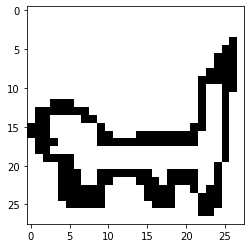

In [107]:
plt.imshow(img.reshape(28,28),cmap="binary")